<a href="https://colab.research.google.com/github/rapu34/A1_performance_factory_Aveners/blob/main/A1project_EDA_Bidding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,843 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bidding_result = pd.read_csv("/content/drive/MyDrive/A1project/bidding_result.csv", encoding='UTF8')
#log = pd.read_csv("/content/drive/MyDrive/A1project/log_csv.csv", encoding='UTF8')

In [ ]:
bidding_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337088 entries, 0 to 1337087
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1337088 non-null  int64  
 1   Impression       1337088 non-null  int64  
 2   Click            1337088 non-null  int64  
 3   Cost             1337088 non-null  float64
 4   Sum of AD rank   1337078 non-null  float64
 5   Bid              1337088 non-null  int64  
 6   Price(PC)        1337088 non-null  int64  
 7   Price(Mobile)    1337088 non-null  int64  
 8   Delivery Fee     1337088 non-null  int64  
 9   Category Name 1  1337088 non-null  object 
 10  Category Name 2  1337088 non-null  object 
 11  Category Name 3  1331221 non-null  object 
 12  Category Name 4  930132 non-null   object 
 13  date             1337088 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 142.8+ MB


In [ ]:
bidding_result.isnull().sum()

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank         10
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406956
date                    0
dtype: int64

In [ ]:
#log.info()

In [ ]:
bidding_result.isnull().sum()

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank         10
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406956
date                    0
dtype: int64

In [ ]:
bidding_result = bidding_result.dropna(subset=['Sum of AD rank'])
bidding_result

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103
1337086,2566891,2,0,0.0,4.000000,500,21000,21000,3000,생활/건강,정원/원예용품,화분받침,NaN,20230103


In [ ]:
bidding_result.isnull().sum()

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank          0
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406952
date                    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_

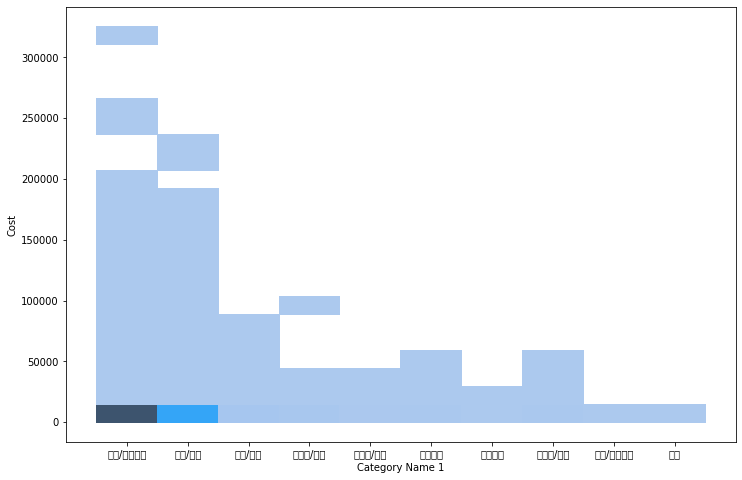

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data= bidding_result, x= "Category Name 1", y= "Cost")
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_

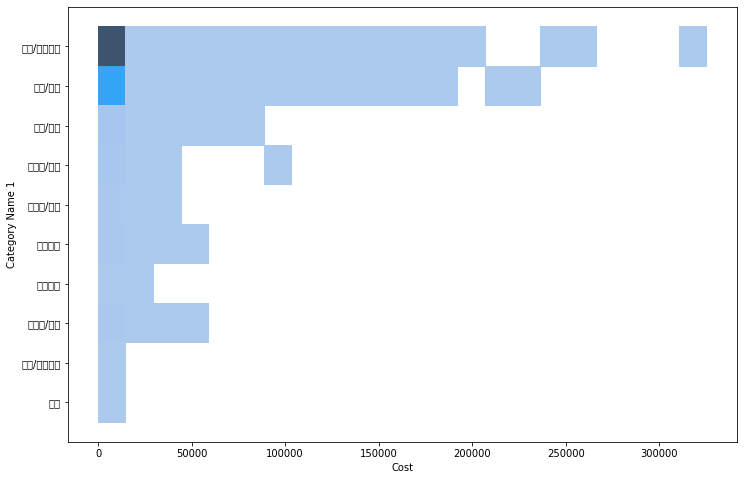

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data= bidding_result, x= "Cost", y= "Category Name 1")
plt.show()

In [ ]:
#광고료가 제일 많이나온 상품은?


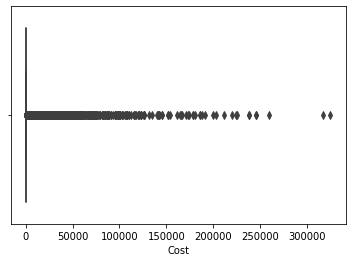

In [ ]:
sns.boxplot(data=bidding_result, x="Cost")

In [ ]:
a = bidding_result.loc[bidding_result['Category Name 1'].isin(bidding_result['Category Name 1'].value_counts()[:5].index)]
a

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103
1337086,2566891,2,0,0.0,4.000000,500,21000,21000,3000,생활/건강,정원/원예용품,화분받침,NaN,20230103


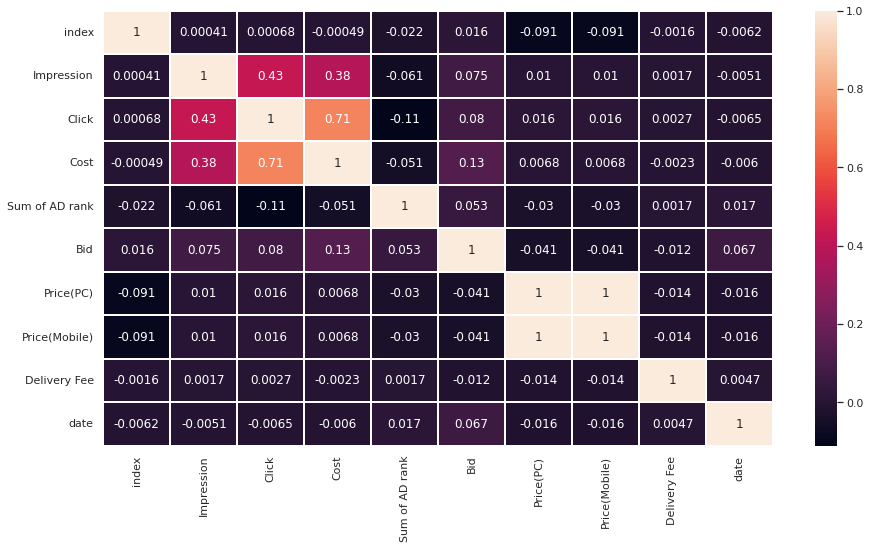

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)}, font ="Malgun Gothic", font_scale = 1)
sns.heatmap(data = bidding_result.corr(), annot=True, linewidths=1)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic' # cost & click 상관관계 매우 높음/cost impression/click impression/click cost

In [ ]:
bidding_result.Click.value_counts()  # 어떤 클릭이 제일 비쌌는지 찾아보기

0      1007240
1       180549
2        61235
3        28678
4        16125
        ...   
195          1
240          1
257          1
177          1
455          1
Name: Click, Length: 189, dtype: int64

In [ ]:
plt.figure(figsize = (20, 6))
sns.lineplot(data = bidding_result, y = 'Click' , x = 'Sum of AD rank' )


In [ ]:
bidding_result.Cost.value_counts()

0.0        1007240
50.0         65986
100.0        22581
150.0        12026
200.0         8849
            ...   
26190.0          1
42270.0          1
10720.0          1
46930.0          1
10160.0          1
Name: Cost, Length: 2406, dtype: int64

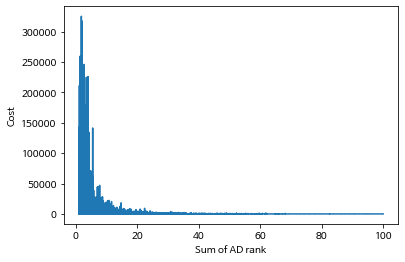

In [ ]:
# 금액대 별 나눠서 어디에 몰려있는지 더 체크
plt.figure(figsize = (20, 6))
sns.lineplot(data = bidding_result, y = 'Cost' , x = 'Sum of AD rank' )
# 1~5등사이에 몰려있다 -> 

In [ ]:
bidding_result['Cost'] = 0
def func(x):
    if x >= 50000 and x < 100000:
        return 2
    elif x >= 100000 and x < 150000:
        return 3
    elif x >= 150000 and x < 200000:
        return 4
    elif x >= 200000 and x < 250000:
        return 5
    elif x >= 250000 and x < 300000:
        return 6
    elif x >= 300000:
        return 7
    else: 
        return 1

bidding_result.Cost = bidding_result.Cost.apply(func)
bidding_result.Cost.value_counts()

1    1337088
Name: Cost, dtype: int64

In [ ]:
bidding_result.Cost.value_counts()

1    1337088
Name: Cost, dtype: int64

In [ ]:
bidding_result[]

In [ ]:
# Sum of AD rank 수가 1이고 cost가 150이하 일때
minimum = bidding_result['Sum of AD rank'] == 1
mimumcost = bidding_result['Bid'] <= 150
subset_df = bidding_result[minimum & mimumcost]
subset_df

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
10,4159623,9,0,0.0,1.0,50,559000,559000,-1,가구/인테리어,침실가구,침대,침대프레임,20221031
13,4163063,25,5,250.0,1.0,50,253000,253000,15000,생활/건강,반려동물,고양이 캣타워,NaN,20221031
37,4183877,49,3,150.0,1.0,120,9900,9900,3000,생활/건강,반려동물,식기/급수기,정수기/필터,20221031
44,4475290,39,1,50.0,1.0,150,314500,314500,0,가구/인테리어,침구세트,이불베개세트,더블/퀸이불베개세트,20221031
95,5161186,26,1,50.0,1.0,50,52000,52000,3000,스포츠/레저,캠핑,기타캠핑용품,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336367,1361011,1,0,0.0,1.0,50,489000,489000,0,가구/인테리어,거실가구,테이블,사이드테이블,20230103
1336381,1361127,3,0,0.0,1.0,50,914000,914000,0,가구/인테리어,서재/사무용가구,의자,인테리어의자,20230103
1336387,1361156,42,0,0.0,1.0,50,1156000,1156000,0,가구/인테리어,서재/사무용가구,사무/교구용가구,사무용의자,20230103
1336391,1361167,1,0,0.0,1.0,50,313600,313600,20000,가구/인테리어,서재/사무용가구,의자,스툴,20230103


In [ ]:
bidding_result.groupby(['Sum of AD rank'])['Bid'].mean()[:10] # 누적순위 1~10등까지의 순위만 의미있다고 판단
# 1등하기 위해 bid 201, 10등 하는데 216원 -> Rank 반올림해서 소숫점 없애버리자

Sum of AD rank
1.000000     200.999625
1.000605     850.000000
1.001109     850.000000
1.001287     850.000000
1.001642      50.000000
                ...    
9.995671      50.000000
9.996212     100.000000
9.996403      50.000000
9.997214     560.000000
10.000000    216.017341
Name: Bid, Length: 75820, dtype: float64

In [ ]:
bidding_result['Sum of AD rank'] = bidding_result['Sum of AD rank'].round(0)
bidding_result['Sum of AD rank']

0           3.0
1           3.0
2           8.0
3           4.0
4           6.0
           ... 
1337083    13.0
1337084    17.0
1337085     8.0
1337086     4.0
1337087    12.0
Name: Sum of AD rank, Length: 1337078, dtype: float64

In [ ]:
bidding_result.groupby(['Sum of AD rank'])['Bid'].mean()[:10] #-> 순위가 낮을 수록 bid금액이 높아짐 ->이상함 #sum

Sum of AD rank
1.0     208.677567
2.0     219.840765
3.0     242.085321
4.0     255.156445
5.0     271.046197
6.0     273.813816
7.0     274.760452
8.0     272.032353
9.0     264.568587
10.0    266.692443
Name: Bid, dtype: float64

In [ ]:
bidding_result.groupby(['Sum of AD rank'])['Cost'].mean()[:10] #-> Cost로 찍어보니 상식과 비슷한 결과가 나옴

Sum of AD rank
1.0     338.376685
2.0     468.601546
3.0     387.556132
4.0     259.325163
5.0     204.165530
6.0     166.044033
7.0     140.045055
8.0     113.104943
9.0      89.867825
10.0     76.274256
Name: Cost, dtype: float64

In [ ]:
bidding_result.groupby(['Click'])['Cost'].mean()[:10] # click 이 높을 수록 cost가 높다 ->당연한 상식 확인

Click
0       0.000000
1     200.933431
2     407.982200
3     626.000070
4     847.258915
5    1091.116731
6    1363.440060
7    1574.176681
8    1897.563309
9    2126.577679
Name: Cost, dtype: float64

In [ ]:
bidding_result.groupby(['Click'])['Bid'].mean()[:10]# click 이 높을 수록 bid가 높다 ->당연한 상식 확인

Click
0    254.422451
1    268.389191
2    279.247489
3    294.034103
4    315.168372
5    331.732753
6    345.938943
7    349.620493
8    365.450197
9    375.235447
Name: Bid, dtype: float64

In [ ]:
bidding_result.groupby(['Sum of AD rank'])['Bid'].max() # 1등하기 위해 최대 2930 bid함(?)

Sum of AD rank
1.0      2930
2.0      3500
3.0      4000
4.0      4000
5.0      3500
         ... 
96.0     1250
97.0     1500
98.0     1410
99.0     1250
100.0     880
Name: Bid, Length: 100, dtype: int64

In [ ]:
bidding_result.groupby(['Sum of AD rank'])['Bid'].min() #최소 50사용해서 순위 차지-->의미 있을까? -> 단순 운일까?

Sum of AD rank
1.0      50
2.0      50
3.0      50
4.0      50
5.0      50
         ..
96.0     50
97.0     50
98.0     50
99.0     50
100.0    50
Name: Bid, Length: 100, dtype: int64

In [ ]:
bidding_result.groupby(['Sum of AD rank'])['Click','Bid'].max() # max 찍었을 때 전체적으로 Click 많이 할 수록 순위가 높다

<ipython-input-66-0a78da341bb2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bidding_result.groupby(['Sum of AD rank'])['Click','Bid'].max() # 전체적으로 Click 많이 할 수록 순위가 높다


,Click,Bid
Sum of AD rank,,
1.0,474,2930
2.0,455,3500
3.0,221,4000
4.0,257,4000
5.0,123,3500
...,...,...
96.0,1,1250
97.0,1,1500
98.0,1,1410


In [ ]:
bidding_result.groupby(['Sum of AD rank'])['Click','Bid','Cost'].mean() # 순위가 높을 수록 Click 많고, bid 가 낮아지는데 왜 그런지 모르겠음.

<ipython-input-68-fa2d4d91f497>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bidding_result.groupby(['Sum of AD rank'])['Click','Bid','Cost'].mean() # Click 많이 할 수 록 bid 가 낮아지는데 왜 그런지 모르겠음.


,Click,Bid,Cost
Sum of AD rank,,,
1.0,1.773955,208.677567,338.376685
2.0,1.989019,219.840765,468.601546
3.0,1.464857,242.085321,387.556132
4.0,0.987483,255.156445,259.325163
5.0,0.759464,271.046197,204.165530
...,...,...,...
96.0,0.002532,237.569620,0.708861
97.0,0.010601,273.180212,1.095406
98.0,0.012903,244.741935,1.838710
